In [ ]:
!pip install ekphrasis
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",

    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.11/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.11/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
# Load Tweet dataset
df = pd.read_excel("tweets-fufufafa.xlsx")
# Output first five rows
df.head()

,tweet,sentimen
0,@arman_dhani Serius ada org yg benci buku?,0.0
1,@OposisiCerdas Anak satu ini emang g punya kem...,-1.0
2,@gg_02022020 @hrdbacot Sip semoga lancar class...,1.0
3,@muannas_alaidid Jangan bodohi orang...mana ad...,-1.0
4,@Ardhansawi @aingriwehuy ngetik yg bnerr fufufafa,-1.0


# **Preprosesing**

In [ ]:
def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

# Apply the function to the 'Tweet' column
df['tweet'] = df['tweet'].apply(remove_mentions)

## Setting fungsi

In [ ]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

## running preprosesing

In [ ]:
final_string = []
for text in df['tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [ ]:
df["step01"] = final_string
df.head()

,tweet,sentimen,step01
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet     2881 non-null   object 
 1   sentimen  2880 non-null   float64
 2   step01    2881 non-null   object 
dtypes: float64(1), object(2)
memory usage: 67.7+ KB


In [ ]:
# dimensionality of the data
df.shape

(2881, 3)

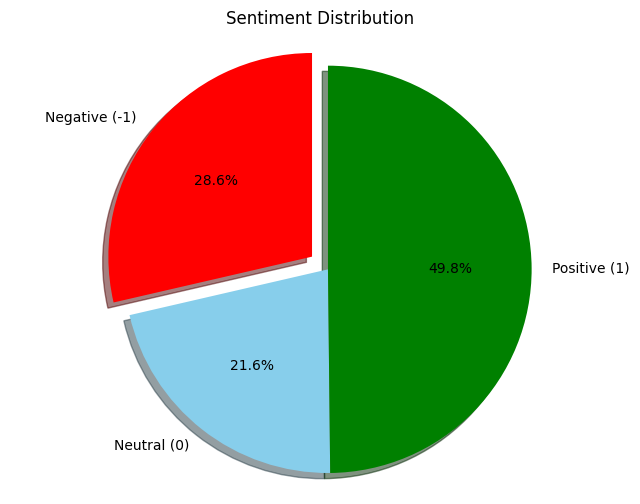

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'sentimen' is the column with sentiment labels (-1, 0, 1)
sentiment_counts = df['sentimen'].value_counts()

# Create the pie chart
labels = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']  # Clearer labels
sizes = [sentiment_counts.get(-1, 0), sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)]
colors = ['red', 'skyblue', 'green']
explode = (0.1, 0, 0)  # Explode the 'Negative' slice

plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Sentiment Distribution')
plt.show()

## Hapus Missing value

In [ ]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [ ]:
df_new = df[~df.isin(df_hapus)].dropna()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2808 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet     2808 non-null   object 
 1   sentimen  2808 non-null   float64
 2   step01    2808 non-null   object 
dtypes: float64(1), object(2)
memory usage: 87.8+ KB


## Normalisasi kata slang

In [ ]:
# token
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [ ]:
df_new.head()

,tweet,sentimen,step01,tokens
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]"
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali..."
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita..."
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n..."
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]"


## Perbaikan kata


In [ ]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

<ipython-input-21-0db02a273aa5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
<ipython-input-21-0db02a273aa5>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


In [ ]:
df_new.head()

,tweet,sentimen,step01,tokens,tokens_perbaikan
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]","[serius, ada, orang, yang, benci, buku]"
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali...","[anak, satu, ini, memang, punya, kemaluan, kal..."
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, kita..."
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n...","[jangan, bodohi, orang, repeated, mana, ada, n..."
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]","[mengetik, yang, bnerr, fufufafa]"


## Stopword Menggunakan Modul NLTK

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,tweet,sentimen,step01,tokens,tokens_perbaikan,Stop_removal
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]","[serius, ada, orang, yang, benci, buku]","[serius, orang, benci, buku]"
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali...","[anak, satu, ini, memang, punya, kemaluan, kal...","[anak, kemaluan, kali, iya, repeated, koq, dip..."
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, dukung]"
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n...","[jangan, bodohi, orang, repeated, mana, ada, n...","[bodohi, orang, repeated, nelayan, sukarela, p..."
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]","[mengetik, yang, bnerr, fufufafa]","[mengetik, bnerr, fufufafa]"
...,...,...,...,...,...,...
2876,"Waalaikumsalam bung tofa, welcome back at X, ...",1.0,waalaikumsalam bung tofa welcome back at folbe...,"[waalaikumsalam, bung, tofa, welcome, back, at...","[waalaikumsalam, bung, tofa, welcome, back, at...","[waalaikumsalam, tofa, welcome, back, at, folb..."
2877,Mundur Wir : Kita butuhnya Leader yang bisa ka...,1.0,mundur wir kita butuhnya leader yang bisa kasi...,"[mundur, wir, kita, butuhnya, leader, yang, bi...","[mundur, wir, kita, butuhnya, leader, yang, bi...","[mundur, wir, butuhnya, leader, kasih, kepasti..."
2878,Kampanye hari ke 20 AMIN Berkunjung ke Aceh T...,1.0,kampanye hari ke number allcaps amin allcaps b...,"[kampanye, hari, ke, number, allcaps, amin, al...","[kampanye, hari, ke, number, allcaps, semoga, ...","[kampanye, number, allcaps, semoga, allcaps, b..."
2879,Minim APK diseluruh Indonesia #AMINAjaDulu #A...,1.0,minim allcaps apk allcaps diseluruh indonesia ...,"[minim, allcaps, apk, allcaps, diseluruh, indo...","[minim, allcaps, apk, allcaps, diseluruh, indo...","[minim, allcaps, apk, allcaps, diseluruh, indo..."


# Stopword Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,tweet,sentimen,step01,tokens,tokens_perbaikan,Stop_removal
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]","[serius, ada, orang, yang, benci, buku]","[serius, orang, benci, buku]"
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali...","[anak, satu, ini, memang, punya, kemaluan, kal...","[anak, kemaluan, kali, iya, repeated, koq, dip..."
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, dukung]"
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n...","[jangan, bodohi, orang, repeated, mana, ada, n...","[bodohi, orang, repeated, nelayan, sukarela, p..."
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]","[mengetik, yang, bnerr, fufufafa]","[mengetik, bnerr, fufufafa]"
...,...,...,...,...,...,...
2876,"Waalaikumsalam bung tofa, welcome back at X, ...",1.0,waalaikumsalam bung tofa welcome back at folbe...,"[waalaikumsalam, bung, tofa, welcome, back, at...","[waalaikumsalam, bung, tofa, welcome, back, at...","[waalaikumsalam, tofa, welcome, back, at, folb..."
2877,Mundur Wir : Kita butuhnya Leader yang bisa ka...,1.0,mundur wir kita butuhnya leader yang bisa kasi...,"[mundur, wir, kita, butuhnya, leader, yang, bi...","[mundur, wir, kita, butuhnya, leader, yang, bi...","[mundur, wir, butuhnya, leader, kasih, kepasti..."
2878,Kampanye hari ke 20 AMIN Berkunjung ke Aceh T...,1.0,kampanye hari ke number allcaps amin allcaps b...,"[kampanye, hari, ke, number, allcaps, amin, al...","[kampanye, hari, ke, number, allcaps, semoga, ...","[kampanye, number, allcaps, semoga, allcaps, b..."
2879,Minim APK diseluruh Indonesia #AMINAjaDulu #A...,1.0,minim allcaps apk allcaps diseluruh indonesia ...,"[minim, allcaps, apk, allcaps, diseluruh, indo...","[minim, allcaps, apk, allcaps, diseluruh, indo...","[minim, allcaps, apk, allcaps, diseluruh, indo..."


In [ ]:
df_new.iloc[0].tokens_perbaikan

['serius', 'ada', 'orang', 'yang', 'benci', 'buku']

In [ ]:
df_new.iloc[0].Stop_removal

['serius', 'orang', 'benci', 'buku']

In [ ]:
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [ ]:
df_new.head()

,tweet,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]","[serius, ada, orang, yang, benci, buku]","[serius, orang, benci, buku]",serius orang benci buku
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali...","[anak, satu, ini, memang, punya, kemaluan, kal...","[anak, kemaluan, kali, iya, repeated, koq, dip...",anak kemaluan kali iya repeated koq dipamerkan...
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, dukung]",sip semoga lancar class action nya dukung
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n...","[jangan, bodohi, orang, repeated, mana, ada, n...","[bodohi, orang, repeated, nelayan, sukarela, p...",bodohi orang repeated nelayan sukarela pakar b...
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]","[mengetik, yang, bnerr, fufufafa]","[mengetik, bnerr, fufufafa]",mengetik bnerr fufufafa


# Stemming menggunakan Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)

    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [ ]:
# Ensure that 'final_string' has the same length as 'df_new' before assigning it.
if len(final_string) != len(df_new):
    # Trim or pad the 'final_string' to match the length of 'df_new'
    # This is a temporary fix, you should investigate why the lengths are mismatched
    diff = len(df_new) - len(final_string)
    if diff > 0:
        final_string.extend([''] * diff)  # Pad with empty strings
    else:
        final_string = final_string[:len(df_new)]  # Trim

df_new["ProcessedText"] = final_string

In [ ]:
df_new.head(10)

,tweet,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,Serius ada org yg benci buku?,0.0,serius ada org yg benci buku,"[serius, ada, org, yg, benci, buku]","[serius, ada, orang, yang, benci, buku]","[serius, orang, benci, buku]",serius orang benci buku,serius orang benci buku
1,Anak satu ini emang g punya kemaluan kali ya....,-1.0,anak satu ini emang punya kemaluan kali ya rep...,"[anak, satu, ini, emang, punya, kemaluan, kali...","[anak, satu, ini, memang, punya, kemaluan, kal...","[anak, kemaluan, kali, iya, repeated, koq, dip...",anak kemaluan kali iya repeated koq dipamerkan...,anak malu kali iya repeated koq pamer bangga d...
2,Sip semoga lancar class action-nya kita dukung,1.0,sip semoga lancar class action nya kita dukung,"[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, kita...","[sip, semoga, lancar, class, action, nya, dukung]",sip semoga lancar class action nya dukung,sip moga lancar class action nya dukung
3,Jangan bodohi orang...mana ada nelayan yang m...,-1.0,jangan bodohi orang repeated mana ada nelayan ...,"[jangan, bodohi, orang, repeated, mana, ada, n...","[jangan, bodohi, orang, repeated, mana, ada, n...","[bodohi, orang, repeated, nelayan, sukarela, p...",bodohi orang repeated nelayan sukarela pakar b...,bodoh orang repeated nelayan sukarela pakar ba...
4,ngetik yg bnerr fufufafa,-1.0,ngetik yg bnerr fufufafa,"[ngetik, yg, bnerr, fufufafa]","[mengetik, yang, bnerr, fufufafa]","[mengetik, bnerr, fufufafa]",mengetik bnerr fufufafa,etik bnerr fufufafa
5,fufufafa login gibran serpihan hati kangen ggs...,1.0,fufufafa login gibran serpihan hati kangen ggs...,"[fufufafa, login, gibran, serpihan, hati, kang...","[fufufafa, login, gibran, serpihan, hati, kang...","[fufufafa, login, gibran, serpihan, hati, kang...",fufufafa login gibran serpihan hati kangen ggs...,fufufafa login gibran serpih hati kangen ggs c...
6,Orang kritik prog makan gratis malah suruh...,-1.0,orang kritik prog makan gratis malah suruh pin...,"[orang, kritik, prog, makan, gratis, malah, su...","[orang, kritik, prog, makan, gratis, malah, su...","[orang, kritik, prog, makan, gratis, suruh, pi...",orang kritik prog makan gratis suruh pindah se...,orang kritik prog makan gratis suruh pindah se...
7,Wah itu susu ne bikin fufufafa bloon makin bl...,-1.0,wah itu susu ne bikin fufufafa bloon makin blo...,"[wah, itu, susu, ne, bikin, fufufafa, bloon, m...","[wah, itu, susu, ne, membuat, fufufafa, bloon,...","[susu, ne, fufufafa, bloon, bloon, repeated]",susu ne fufufafa bloon bloon repeated,susu ne fufufafa bloon bloon repeated
8,Melawan dengan apa coba? Adu Argumen? Di tik t...,0.0,melawan dengan apa coba adu argumen di tik tok...,"[melawan, dengan, apa, coba, adu, argumen, di,...","[melawan, dengan, apa, coba, adu, argumen, di,...","[melawan, coba, adu, argumen, tik, banget, typ...",melawan coba adu argumen tik banget typingan k...,lawan coba adu argumen tik banget typingan kay...
9,Wkwkwk emng dongo bgt ya wkwkwk,-1.0,wkwkwk emng dongo bgt ya wkwkwk,"[wkwkwk, emng, dongo, bgt, ya, wkwkwk]","[wkwkwk, emng, dongo, banget, iya, wkwkwk]","[wkwkwk, emng, dongo, banget, iya, wkwkwk]",wkwkwk emng dongo banget iya wkwkwk,wkwkwk emng dongo banget iya wkwkwk


In [ ]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

# Penataan data

## pembagian fitur dan label

In [1]:
import pandas as pd
import numpy as np

In [12]:
dataset = pd.read_csv('clean_dataset_part01.csv',sep=";")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2808 non-null   int64  
 1   tweet             2808 non-null   object 
 2   sentimen          2808 non-null   float64
 3   step01            2808 non-null   object 
 4   tokens            2808 non-null   object 
 5   tokens_perbaikan  2808 non-null   object 
 6   Stop_removal      2808 non-null   object 
 7   step02            2807 non-null   object 
 8   ProcessedText     2807 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 197.6+ KB


In [14]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [15]:
dataset_feature.head(10)

,ProcessedText
0,serius orang benci buku
1,anak malu kali iya repeated koq pamer bangga d...
2,sip moga lancar class action nya dukung
3,bodoh orang repeated nelayan sukarela pakar ba...
4,etik bnerr fufufafa
5,fufufafa login gibran serpih hati kangen ggs c...
6,orang kritik prog makan gratis suruh pindah se...
7,susu ne fufufafa bloon bloon repeated
8,lawan coba adu argumen tik banget typingan kay...
9,wkwkwk emng dongo banget iya wkwkwk


In [16]:
dataset_label = dataset['sentimen']

In [17]:
dataset_label.head(10)

,sentimen
0,0.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
5,1.0
6,-1.0
7,-1.0
8,0.0
9,-1.0


## Distribusi label

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-19-6b19bd2067b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


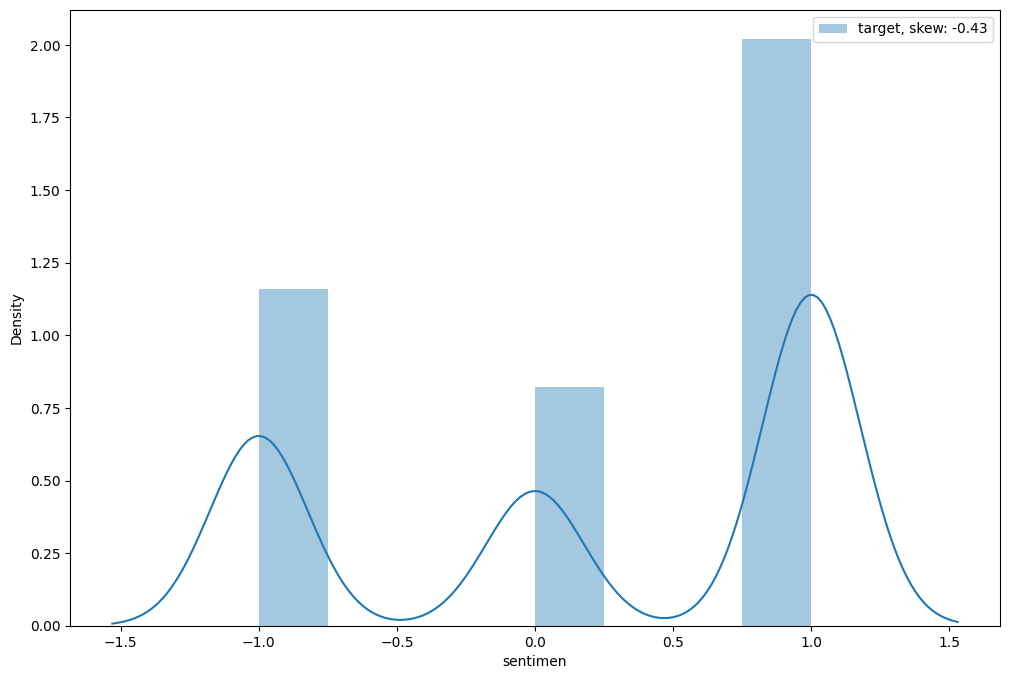

In [19]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [20]:
dataset_label.value_counts()

,count
sentimen,
1.0,1418
-1.0,813
0.0,577


# Ekstraksi fitur dan machine learning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [22]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [24]:
test_x

,ProcessedText
1539,bismillaahirrohmaanirrohiim repeated hashtag a...
2347,bismillaahirrohmaanirrohiim hasbunallaah wani ...
2373,cantik cerdas iya repeated hashtag anies muhai...
1487,sedih rivew jejak digital this time for ngeruj...
1097,rt bagus elongated
...,...
1538,wakanda no more indonesia forever hashtag moga...
1370,menteri dagang iya
1452,lagu indonesia raya nyanyi bahasa jepang indon...
1779,eh repeated nya gabung rezim kuat nahan lapar ...


## TF-IDF Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

# Implementasi Naive Bayes


In [25]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [26]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [28]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [29]:
classifier_nb.fit(train_x, train_label.ravel())

<ipython-input-29-4a4839e58558>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classifier_nb.fit(train_x, train_label.ravel())


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [30]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9954198473282443
Accuracy Test set:  0.6809015421115066


In [31]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9954198473282443
Recall Test set:  0.6809015421115066


In [32]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.995445167158411
Precision Test set:  0.669481011149779


In [33]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.9954261877557283
F1 Test set:  0.6730521773875721


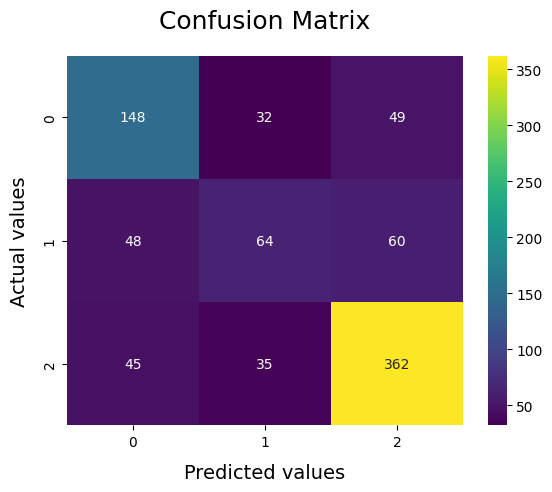

In [34]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Prediksi

In [35]:
# Predict sentiment of new text inputs
def predict_sentiment(text, model):
    sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}  # Sesuaikan dengan dataset
    probabilities = model.predict_proba([text])[0]

    # Determine sentiment based on highest probability
    max_prob_index = np.argmax(probabilities)  # Index of the max probability
    prediction = [-1, 0, 1][max_prob_index]  # Map index to sentiment
    sentiment = sentiment_map.get(prediction, 'Unknown')

    return sentiment, probabilities

# Interactive prediction
def main():
    print("\n--- Sentiment Prediction ---")
    while True:
        user_input = input("Enter text to analyze sentiment (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            print("Exiting the program.")
            break

        sentiment, probabilities = predict_sentiment(user_input, classifier_nb)
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Probabilities: Negative={probabilities[0]:.2f}, Neutral={probabilities[1]:.2f}, Positive={probabilities[2]:.2f}\n")

if __name__ == "__main__":
    main()



--- Sentiment Prediction ---
Enter text to analyze sentiment (or type 'exit' to quit): jokowi gatau diri maunya jadi diktator
Predicted Sentiment: Positive
Probabilities: Negative=0.01, Neutral=0.01, Positive=0.98

Enter text to analyze sentiment (or type 'exit' to quit): jokowi tolol tidak becus dalam memimpin indonesia
Predicted Sentiment: Negative
Probabilities: Negative=1.00, Neutral=0.00, Positive=0.00



KeyboardInterrupt: Interrupted by user

In [36]:
import pickle

# Save the trained model as a .sav file
with open('sentiment_model.sav', 'wb') as model_file:
    pickle.dump(classifier_nb, model_file)

print("Model has been saved as 'sentiment_model.sav'")


Model has been saved as 'sentiment_model.sav'
